# Milestone 2 Fase 2 - Trending Youtube Text Categorization

___________________

# I. Introduction

> Nama : Nirwan Arrachman  
Batch : FTDS 11  
  
Notebook ini bertujuan untuk membuat sebuah model Natural Language Processing (NLP) yang dapat melakukan text categorization sebuah judul trending youtube. Dataset yang digunakan adalah dataset "Trending Youtube Video Statistics" di negara USA. Dataset ini dapat diakses di Kaggle melalui link berikut [Dataset](https://www.kaggle.com/datasets/datasnaek/youtube-new?datasetId=4549&searchQuery=nlp&select=USvideos.csv).  
  
Text categorization merupakan sebuah metode yang dapat melakukan kategorisasi sebuah teks menjadi beberapa kategori. Youtube sebagai platform berbagi video paling populer di dunia memiliki algoritma tersendiri dalam melakukan text categorization pada video-video trending sehingga memudahkan penonton dalam mencari preferensi video mereka masing-masing. Pada notebook ini, saya akan mencoba membuat sebuah model text categorization versi saya sendiri dengan menggunakan Deep Neural Network (DNN).

Dataset ini memiliki total 40.949 baris data judul trending youtube di USA dari November 2017 sampai Juni 2018. Terdapat total 16 kolom data sebagai berikut:
1. `video_id` : Kode unik id video
2. `trending_date` : Tanggal video mulai trending di Youtube	
3. `title` : Judul Video
4. `channel_title` : Nama Channel Youtube
5. `category_id` : Kode unik id kategori video	
6. `publish_time`	: Tanggal rilis video
7. `tags`	: Kata kunci deskriptif video
8. `views` : Jumlah video ditonton
9. `likes` : Jumlah video disukai (likes) penonton	
10. `dislikes` : Jumlah video tidak disukai (dislikes) penonton
11. `comment_count` : Jumlah video dikomentari penonton
12. `thumbnail_link` : Link thumbnail video
13. `comments_disabled` : Apakah kolom komentar dikunci atau tidak
14. `ratings_disabled` : Apakah ratings likes atau dislikes dikunci atau tidak
15. `video_error_or_removed` : Apakah video error atau dihapus atau tidak
16. `description` : Deskripsi isi konten video  
  
Objective dari notebook ini adalah sebagai berikut:
1. Melakukan EDA dan mendapatkan insight dari dataset yang digunakan
2. Membuat model NLP yang dapat melalukan text categorization video trending youtube
3. Melakukan model inference pada data inference yang telah dipisahkan
  


________________

# II. Import Libraries

Library yang akan digunakan dalam notebook ini adalah pandas, numpy, matplotlib, seaborn, scikitlearn, tensorflow.

In [1]:
# import library umum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# preprocessing
from sklearn.model_selection import train_test_split
import nltk
import string

# model
import tensorflow as tf
from tensorflow import keras

# wordcloud untuk visualisasi
from wordcloud import WordCloud

# metrics
from sklearn.metrics import classification_report

In [2]:
# preprocessing teks
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# regex
import re

In [3]:
# download package library nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [4]:
# encoder label
from tensorflow.keras.utils import to_categorical

In [5]:
# model layers
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding

# model
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential, model_from_json

In [6]:
# code untuk menghilangkan warning
from warnings import filterwarnings
filterwarnings('ignore')

________________

# III. Data Loading

Dataset yang digunakan adalah dataset dengan nama file `USvideos.csv` dan untuk kolom `category_id` akan saya encode berdasarkan nama category aslinya yang ada pada file `US_category_id.json`.

## Load Dataset

In [7]:
# koneksi dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/data/USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Merge Kolom `Category` dari File Json

In [9]:
# ubah tipe data kolom 'category_id' menjadi str (object)
df['category_id'] = df['category_id'].astype(str)

In [10]:
# menambah kolom 'category' berdasarkan kategori pada file json
category_id = {}

with open('/content/drive/MyDrive/data/US_category_id.json', 'r') as f:
  df_category = json.load(f)
  for category in df_category['items']:
    category_id[category['id']] = category['snippet']['title']

df.insert(4, 'category', df['category_id'].map(category_id)) # insert di column index ke-4

In [11]:
# list kategori dan jumlah kategori
category_list = df['category'].unique()
print('List Kategori :', category_list)
print('Jumlah Kategori :', len(category_list))

List Kategori : ['People & Blogs' 'Entertainment' 'Comedy' 'Science & Technology'
 'Film & Animation' 'News & Politics' 'Sports' 'Music' 'Pets & Animals'
 'Education' 'Howto & Style' 'Autos & Vehicles' 'Travel & Events' 'Gaming'
 'Nonprofits & Activism' 'Shows']
Jumlah Kategori : 16


Terdapat total 16 kategori trending youtube di dalam dataset ini. Kategori inilah yang akan menjadi kolom label / target dalam notebook ini.

In [12]:
# preview data setelah ditambah kolom 'category'
df.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Manipulasi Kolom Data Type

In [13]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category                40949 non-null  object
 5   category_id             40949 non-null  object
 6   publish_time            40949 non-null  object
 7   tags                    40949 non-null  object
 8   views                   40949 non-null  int64 
 9   likes                   40949 non-null  int64 
 10  dislikes                40949 non-null  int64 
 11  comment_count           40949 non-null  int64 
 12  thumbnail_link          40949 non-null  object
 13  comments_disabled       40949 non-null  bool  
 14  ratings_disabled        40949 non-null  bool  
 15  vi

Kolom `trending_date` dan `publish_time` masih bertipe data object, sehingga kedua kolom ini perlu diubah terlebih dahulu menjadi tipe data datetime.

In [14]:
# ubah tipe data kolom menjadi datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [15]:
# pengecekan kembali tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category                40949 non-null  object        
 5   category_id             40949 non-null  object        
 6   publish_time            40949 non-null  datetime64[ns]
 7   tags                    40949 non-null  object        
 8   views                   40949 non-null  int64         
 9   likes                   40949 non-null  int64         
 10  dislikes                40949 non-null  int64         
 11  comment_count           40949 non-null  int64         
 12  thumbnail_link          40949 non-null  object

Tipe data kolom `trending_date` dan `publish_time` telah diubah menjadi datetime.  
  
Terdapat kolom data yang missing values yaitu pada kolom `description`. Karena saya tidak akan menggunakan kolom data ini, maka saya tidak akan melakukan handling missing values pada data yang kosong tersebut.

## Cek Duplikat Data

In [16]:
# pengecekan duplikat data
df.duplicated().sum()

48

Terdapat 48 baris data duplikat dalam dataset ini, maka data duplikat ini dapat kita drop agar tidak menimbulkan bias.

In [17]:
# drop duplikat data
df.drop_duplicates(inplace = True)

In [18]:
# ukuran dimensi dataset
df.shape

(40901, 17)

Dataset untuk EDA dan training model adalah 40.901 baris data dan 17 kolom data.

_______________________

# IV. Exploratory Data Analysis

Pada bagian EDA ini saya akan mencoba untuk mendapatkan insight yang ada pada dataset trending youtube ini. Semakin banyak insight yang didapatkan maka semakin baik gambaran kita mengenai dataset ini. 

## Rata-rata Jumlah Video Trending per Hari

EDA pertama adalah saya ingin mengetahui rata-rata jumlah video trending youtube per harinya. 

In [19]:
df.groupby('trending_date').count()['title'].mean()

199.51707317073172

Hasil coding diatas menunjukan bahwa dataset ini menyimpan rata-rata sekitar 200 judul video trending youtube setiap harinya.

## Top 5 Trending Video Terlama

EDA berikutnya adalah saya ingin melihat trending video dengan trending terlama. Hal ini bertujuan untuk melihat tren video seperti apa yang dapat bertahan lama di trending youtube.

In [20]:
top_trending_video = df.groupby(by = 'video_id', as_index = False).count().sort_values(by = 'title', ascending = False).head(5)
top_trending_video

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4666,j4KvrAUjn6c,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
964,8h--kFui1JA,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2730,QBL8IRJ5yHU,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2414,NBSAQenU2Bk,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
746,6S9c5nnDd_s,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [21]:
# trending no. 1
df[df['video_id'] == 'j4KvrAUjn6c'][['title', 'channel_title', 'category', 'thumbnail_link']].iloc[0]

title                 WE MADE OUR MOM CRY...HER DREAM CAME TRUE!
channel_title                                   Lucas and Marcus
category                                           Entertainment
thumbnail_link    https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg
Name: 34550, dtype: object

In [22]:
# trending no. 2
df[df['video_id'] == '8h--kFui1JA'][['title', 'channel_title', 'category', 'thumbnail_link']].iloc[0]

title                Sam Smith - Pray (Official Video) ft. Logic
channel_title                                  SamSmithWorldVEVO
category                                                   Music
thumbnail_link    https://i.ytimg.com/vi/8h--kFui1JA/default.jpg
Name: 33750, dtype: object

In [23]:
# trending no. 3
df[df['video_id'] == 'QBL8IRJ5yHU'][['title', 'channel_title', 'category', 'thumbnail_link']].iloc[0]

title             Why I'm So Scared (being myself and crying too...
channel_title                                         grav3yardgirl
category                                              Howto & Style
thumbnail_link       https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg
Name: 34750, dtype: object

In [24]:
# trending no. 4
df[df['video_id'] == 'NBSAQenU2Bk'][['title', 'channel_title', 'category', 'thumbnail_link']].iloc[0]

title             Rooster Teeth Animated Adventures - Millie So ...
channel_title                                         Rooster Teeth
category                                           Film & Animation
thumbnail_link       https://i.ytimg.com/vi/NBSAQenU2Bk/default.jpg
Name: 34760, dtype: object

In [25]:
# trending no. 5
df[df['video_id'] == '6S9c5nnDd_s'][['title', 'channel_title', 'category', 'thumbnail_link']].iloc[0]

title             Bohemian Rhapsody | Teaser Trailer [HD] | 20th...
channel_title                                      20th Century Fox
category                                           Film & Animation
thumbnail_link       https://i.ytimg.com/vi/6S9c5nnDd_s/default.jpg
Name: 34949, dtype: object

Dari kelima video trending terlama diatas kita dapat mengetahui bahwa kategori film and animation mendominasi video trending terlama di youtube. Kategori ini biasanya adalah kategori yang berisi video trailer atau teaser film yang sedang atau akan tampil di bioskop. Adapula dari kategori music yaitu perilisan single terbaru dari beberapa musisi ternama. Semakin populer musisi tersebut maka semakin lama trendingnya. Trending video terlama di dataset ini adalah 29 hari.

## Barplot Trending Youtube Category

EDA ini akan mencoba untuk melihat kategori apa yang paling sering menjadi trending youtube di USA. Hasil ini akan menjadi gambaran kita terhadap preferensi umum warga USA dalam menonton video yang ada di youtube.

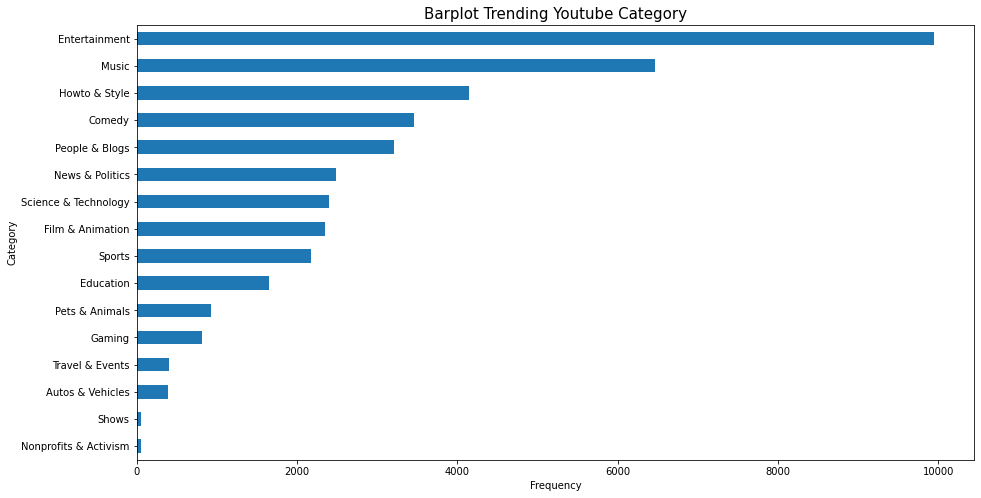

In [26]:
plt.figure(figsize = (15, 8))
df['category'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Barplot Trending Youtube Category', size = 15)
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

Barplot diatas menunjukan bahwa kategori entertainment menjadi kategori yang paling banyak menjadi trending, lalu diikuti oleh kategori music dan Howto & Style. Kategori shows dan nonprofits & activism menjadi kategori yang paling sedikit menjadi trending di youtube. Hal ini menunjukan bahwa warga USA lebih menyukai menonton video kategori entertainment daripada kategori lainnya. 

## Wordcloud Top 3 Category Trending Youtube

Pada EDA ini saya ingin memperlihatkan Word Cloud atau pembendaharaan kata apa yang paling sering muncul pada top 3 kategori yang paling trending di youtube yaitu kategori entertainment, music, dan howto & style. Namun sebelum itu data teks judul video perlu melalui tahap preprocessing agar dapat ditampilkan. Maka EDA ini akan dilanjutkan pada bagian akhir sebelum Conclusion.

## Top 5 Trending Channel 

EDA berikutnya adalah saya ingin melihat channel youtube yang paling sering menjadi trending di USA. 

In [27]:
top_trending_channel = df.groupby(by = 'channel_title', as_index = False).count().sort_values(by = 'title', ascending = False).head(5)
top_trending_channel

,channel_title,video_id,trending_date,title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
555,ESPN,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
1785,The Tonight Show Starring Jimmy Fallon,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
1271,Netflix,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
1943,Vox,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
1804,TheEllenShow,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192


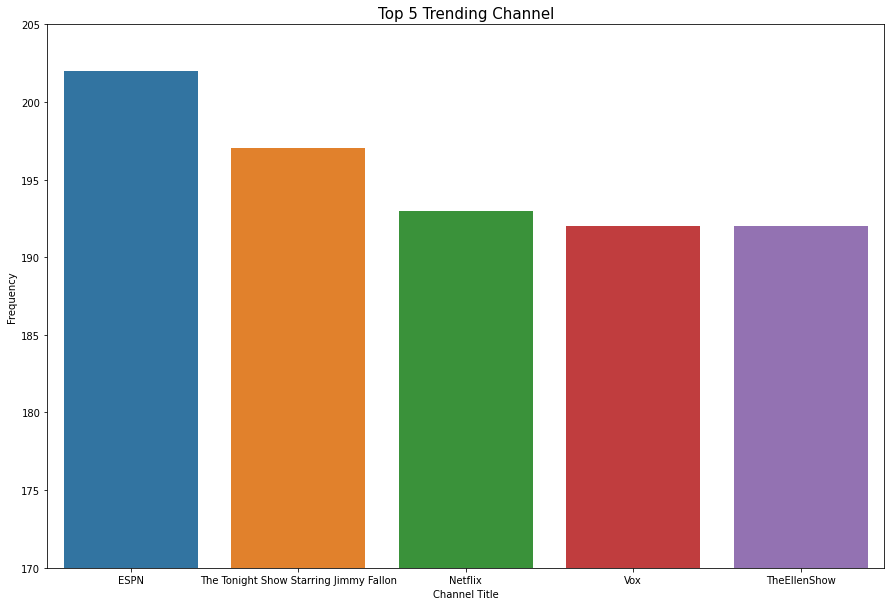

In [28]:
plt.figure(figsize = (15,10))
sns.barplot(data = top_trending_channel, x = top_trending_channel['channel_title'], y = top_trending_channel['title'])
plt.title('Top 5 Trending Channel', size = 15)
plt.xlabel('Channel Title')
plt.ylabel('Frequency')
plt.ylim(170,205)
plt.show()

Barplot diatas menunjukan bahwa channel youtube ESPN menjadi channel yang paling sering trending di USA dengan 202 kali video dari channel ini yang menjadi trending. Channel yang paling banyak trending berikutnya adalah The Tonight Show Starring Jimmy Fallon, Netflix, Vox, dan TheEllenShow. Dari top 5 channel trending tersebut, tidak ada channel yang merupakan channel individu atau perorangan. Seluruh top 5 channel merupakan channel korporasi yang cukup besar. Hal ini menunjukan bahwa channel korporasi masih mendominasi trending youtube di USA.

_______________

# V. Data Preprocessing

Sebelum dataset digunakan untuk training model, kita perlu melakukan preprocessing dataset agar dataset dapat digunakan pada training model. Proses preprocessing dataset yang akan saya lakukan adalah sebagai berikut:
1. Split Data Inference
2. Split Label (y) dan Fitur (X)
3. Case Folding dan Stemming
4. Split Trainval-set dan Test-set
5. Split Train-set dan Val-set
6. Encode Label (y)
7. Build Tokenization Layers (untuk training model)
8. Build Word Embedding Layers (untuk training model)
9. Pipeline Tensor Flow (untuk validation test)

## Split Data Inference

Untuk melakukan model inference, saya akan memisahkan 10 data sampel dari dataset awal yang selanjutnya akan disimpan dalam variabel baru bernama `df_inf`.

In [29]:
# split data inference dari dataset awal
df_inf = df.sample(10, random_state = 100)
df_inf

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
30061,tfREC-AkX20,2018-04-21,Why black Americans are getting less sleep,Vox,News & Politics,25,2018-04-12 13:55:36,"SleepCycle|""sleep""|""science""|""vox""|""Vox.com""|""...",667705,10038,34254,10818,https://i.ytimg.com/vi/tfREC-AkX20/default.jpg,False,False,False,How the sleep gap reflects inequality and cont...
727,F388-6yDDpc,2017-11-17,Cowboys vs. Falcons | NFL Week 10 Game Highlights,NFL,Sports,17,2017-11-13 00:51:15,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",1014512,5954,541,3174,https://i.ytimg.com/vi/F388-6yDDpc/default.jpg,False,False,False,The Dallas Cowboys battle the Atlanta Falcons ...
5355,mG9kK9TgxkQ,2017-12-10,Glam Masters | Official Trailer | New Series P...,Lifetime,Entertainment,24,2017-12-05 18:13:45,"lifetime|""lifetime shows""|""lifetime tv""|""lifet...",63283,187,39,30,https://i.ytimg.com/vi/mG9kK9TgxkQ/default.jpg,False,False,False,"Lifetime’s new beauty competition series, Glam..."
24527,GO_Jxa6dWyo,2018-03-18,Could You Be Immune To Everything?,It's Okay To Be Smart,Education,27,2018-03-07 17:32:51,"science|""pbs digital studios""|""pbs""|""joe hanso...",213958,11023,112,717,https://i.ytimg.com/vi/GO_Jxa6dWyo/default.jpg,False,False,False,You can learn more at https://curiositystream....
19529,8ENIIcMmeD0,2018-02-21,♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡,Nikita Dragun,Howto & Style,26,2018-02-13 19:59:13,"Nikita Dragun|""nikita""|""dragun""|""makeup""|""mua""...",506920,35041,564,1968,https://i.ytimg.com/vi/8ENIIcMmeD0/default.jpg,False,False,False,This makeup look is perfect for Valentines Day...
484,d380meD0W0M,2017-11-16,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2584165,147110,2305,19313,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
22432,p2ZNmYnx7ds,2018-03-08,UFC 222: Brian Ortega Octagon Interview,UFC - Ultimate Fighting Championship,Sports,17,2018-03-04 05:32:55,"ufc|""222""|""brian""|""ortega""|""octagon""|""intervie...",531165,4979,226,1931,https://i.ytimg.com/vi/p2ZNmYnx7ds/default.jpg,False,False,False,Hear from Brian Ortega inside of the Octagon a...
31162,903QDFbbeww,2018-04-27,I Ran 10 Miles Every Day Like Casey Neistat,BuzzFeedVideo,People & Blogs,22,2018-04-25 18:00:51,"BuzzFeed|""BuzzFeedVideo""|""BuzzFeed Video""|""Vid...",688120,19352,1068,1338,https://i.ytimg.com/vi/903QDFbbeww/default.jpg,False,False,False,"If I'm gonna run like Casey, I gotta really go..."
25717,LeFxjRMv5U8,2018-03-24,Meet Cora,Kitty Hawk,Science & Technology,28,2018-03-13 04:53:26,"flying car|""kitty hawk""|""drone""|""tesla""|""air t...",744801,5319,413,1093,https://i.ytimg.com/vi/LeFxjRMv5U8/default.jpg,False,False,False,"Meet Cora, Kitty Hawk's prototype air taxi tha..."
38582,zNZJNlx4P80,2018-06-03,WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),HellthyJunkFood,Entertainment,24,2018-05-30 23:59:24,"giant macaron|""macaroon""|""how to make macaroon...",449100,10629,589,1794,https://i.ytimg.com/vi/zNZJNlx4P80/default.jpg,False,False,False,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...


In [30]:
# cek proporsi label pada data inference
df_inf['category'].value_counts()

Entertainment           3
Sports                  2
News & Politics         1
Education               1
Howto & Style           1
People & Blogs          1
Science & Technology    1
Name: category, dtype: int64

Data inference yang sudah dipisahkan lalu didrop index datanya pada dataset untuk training model agar model tidak mengalami kebocoran data karena model telah mempelajari data inference tersebut terlebih dahulu.

In [31]:
# drop index data inference pada data untuk train-val-test set
df_train_val_test = df.drop(df_inf.index)

Selanjutnya saya melakukan reset index agar penomoran data kembali sesuai urutannya pada masing-masing variabel dataset.

In [32]:
# reset index
df_train_val_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

## Split Label (y) dan Fitur (X)

Label adalah variabel yang ingin diprediksi, yaitu kolom `category` dengan total 16 jenis kategori. Fitur adalah kolom teks judul video yang akan dijadikan sebagai variabel dalam memprediksi label `category`.

In [33]:
# split label dan fitur
X = df_train_val_test['title']
y = df_train_val_test['category']

print('Ukuran dimensi fitur: ', X.shape)
print('Ukuran dimensi label: ', y.shape)

Ukuran dimensi fitur:  (40891,)
Ukuran dimensi label:  (40891,)


## Case Folding dan Stemming

Case folding adalah proses teks preprocessing untuk data teks menjadi data yang dapat digunakan untuk membangun model NLP. Pada teks preprocessing ini, saya tidak akan menghilangkan angka pada teks, karena saya berpendapat bahwa banyak sekali judul video youtube yang memiliki angka sebagai konteks videonya, sehingga jika kita menghilangkan angka, maka kita akan kehilangan konteks dari video tersebut. Berikut adalah tahapan-tahapan case folding yang akan saya gunakan:

- Ubah teks ke lowercase
- Menghilangkan tanda @___ (mention) pada teks
- Menghilangkan hashtag #___ pada teks
- Menghilangkan karakter yang bukan huruf atau angka
- Menghilangkan karakter kepemilikan ('s) pada teks
- Menghilangkan karakater pembantu seperti .,+-'"/ dll (punctuation)

Lalu saya juga akan menambah beberapa proses teks preprocessing seperti berikut:
- Menghilangkan stopwords atau kata-kata umum
- Melakukan Stemming atau mengubah kata menjadi kata dasarnya

Pada proses stemming, saya akan mencoba membandingkan antara `PorterStemmer` dengan `WordNetLemmatizer`. Kedua metode stemming tersebut sangat populer digunakan, namun untuk memilih yang terbaik diantara keduanya saya akan melakukan pengujian kedua metode tersebut dan menentukan metode mana yang lebih baik.

In [34]:
# download package untuk stemming
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# download package untuk stemming
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
# pendefinisian untuk stopwords dalam bahasa inggris
stpwds_en = list(set(stopwords.words('english')))

In [37]:
# pendefinisian dua metode stemming
stemmer_porter = PorterStemmer()
stemmer_wordnet = WordNetLemmatizer()

In [38]:
# fungsi teks preprocessing dengan stemmer Porter

def text_process1(teks):
  teks = teks.lower() # ubah ke lowercase
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) # Menghilangkan mention @
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) # Menghilangkan hashtag #
  teks = re.sub("[^A-Za-z0-9\s']"," ", teks) # Menghilangkan yang bukan huruf dan angka
  teks = re.sub("'s"," ",teks) # Menghilangkan 's
  teks = teks.translate(str.maketrans("","",string.punctuation)) # Menghilangkan teks punctuation
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_en]) # Menghilangkan stopwords
  teks = stemmer_porter.stem(teks) # stemming menggunakan Porter
  return teks

In [39]:
# fungsi teks preprocessing dengan stemmer Word Net

def text_process2(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) # Menghilangkan mention @
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) # Menghilangkan hashtag #
  teks = re.sub("[^A-Za-z0-9\s']"," ", teks) # Menghilangkan yang bukan huruf dan angka
  teks = re.sub("'s"," ",teks) # Menghilangkan 's
  teks = teks.translate(str.maketrans("","",string.punctuation)) # Menghilangkan teks punctuation
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_en]) # Menghilangkan stopwords
  teks = stemmer_wordnet.lemmatize(teks) # stemming menggunakan wordnet
  return teks

In [40]:
# mencoba fungsi teks preprocessing menggunakan stemmer Porter
X1 = X[:50]

X1 = X1.apply(lambda a: text_process1(a))
X1

0                                     want talk marriag
1     trump presidency last week tonight john oliver...
2       racist superman rudy mancuso king bach lele pon
3                            nickelback lyrics real fak
4                                       dare going bald
5                                      2 weeks iphone x
6                 roy moore jeff sessions cold open snl
7                          5 ice cream gadgets put test
8     greatest showman official trailer 2 hd 20th ce...
9                             rise robots mean end work
10    dion lewis 103 yd kick return td vs denver can...
11    spoilers hiva saves day talked scene ep 804 wa...
12               marshmello blocks official music video
13                                    countries collaps
14                                    shopping new fish
15                                         new spotmini
16              one change would make pacific rim class
17                      body know youre full hil

In [41]:
# mencoba fungsi teks preprocessing menggunakan stemmer Word Net
X2 = X[:50]

X2 = X2.apply(lambda a: text_process2(a))
X2

0                                    want talk marriage
1     trump presidency last week tonight john oliver...
2      racist superman rudy mancuso king bach lele pons
3                           nickelback lyrics real fake
4                                       dare going bald
5                                      2 weeks iphone x
6                 roy moore jeff sessions cold open snl
7                          5 ice cream gadgets put test
8     greatest showman official trailer 2 hd 20th ce...
9                             rise robots mean end work
10    dion lewis 103 yd kick return td vs denver can...
11    spoilers hiva saves day talked scene ep 804 wa...
12               marshmello blocks official music video
13                                   countries collapse
14                                    shopping new fish
15                                         new spotmini
16            one change would make pacific rim classic
17                   body know youre full hilary

Dari hasil dua metode stemmer diatas, terlihat bahwa stemmer Porter menghasilkan kata yang sulit diterjemahkan dalam bahasa inggris, seperti kata 'marriag', 'driv', 'fak', 'col', 'leagu', 'commerci', dll. Sedangkan stemmer Word Net dapat dengan baik mengubah kata-kata menjadi bentuk dasarnya dan masih dapat diterjemahkan dalam bahasa inggris dengan baik. Sehingga stemmer yang akan digunakan pada teks preprocessing ini adalah stemmer yang menggunakan `WordNet`.

In [42]:
# penerapan fungsi teks preprocessing pada fitur (X)
X = X.apply(lambda a: text_process2(a))
X.head(10)

0                                   want talk marriage
1    trump presidency last week tonight john oliver...
2     racist superman rudy mancuso king bach lele pons
3                          nickelback lyrics real fake
4                                      dare going bald
5                                     2 weeks iphone x
6                roy moore jeff sessions cold open snl
7                         5 ice cream gadgets put test
8    greatest showman official trailer 2 hd 20th ce...
9                            rise robots mean end work
Name: title, dtype: object

Fitur teks telah berhasil melalui teks preprocessing, selanjutnya fitur teks ini dapat displit menjadi train-val-test set

## Split Trainval-set dan Test-set

Split data antara data trainval-set dan data test-set dengan perbandingan 80% data trainval-set, dan 20% data test-set.

In [43]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

print('Ukuran dimensi Data Trainval-set: ', X_trainval.shape)
print('Ukuran dimensi Data Test-set: ', X_test.shape)

Ukuran dimensi Data Trainval-set:  (32712,)
Ukuran dimensi Data Test-set:  (8179,)


In [44]:
# Cek proporsi label pada data trainval-set dan test-set
print('Proporsi label pada Data Trainval-set: \n', y_trainval.value_counts(),'\n')
print('Proporsi label pada Data Test-set: \n', y_test.value_counts())

Proporsi label pada Data Trainval-set: 
 Entertainment            7953
Music                    5173
Howto & Style            3313
Comedy                   2762
People & Blogs           2565
News & Politics          1987
Science & Technology     1917
Film & Animation         1874
Sports                   1736
Education                1323
Pets & Animals            736
Gaming                    653
Travel & Events           321
Autos & Vehicles          307
Shows                      46
Nonprofits & Activism      46
Name: category, dtype: int64 

Proporsi label pada Data Test-set: 
 Entertainment            1988
Music                    1294
Howto & Style             828
Comedy                    691
People & Blogs            642
News & Politics           497
Science & Technology      479
Film & Animation          469
Sports                    434
Education                 331
Pets & Animals            184
Gaming                    163
Travel & Events            80
Autos & Vehicles     

## Split Train-set dan Val-set

Split data antara data train-set dan data val-set dengan perbandingan 80% data train-set, dan 20% data val-set.

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, random_state = 100, stratify = y_trainval)

print('Ukuran dimensi Data Train-set: ', X_train.shape)
print('Ukuran dimensi Data Val-set: ', X_val.shape)

Ukuran dimensi Data Train-set:  (26169,)
Ukuran dimensi Data Val-set:  (6543,)


In [46]:
# Cek proporsi label pada data train-set dan val-set
print('Proporsi label pada Data Train-set: \n', y_train.value_counts(),'\n')
print('Proporsi label pada Data Val-set: \n', y_val.value_counts())

Proporsi label pada Data Train-set: 
 Entertainment            6362
Music                    4138
Howto & Style            2650
Comedy                   2209
People & Blogs           2052
News & Politics          1590
Science & Technology     1534
Film & Animation         1499
Sports                   1389
Education                1058
Pets & Animals            589
Gaming                    522
Travel & Events           257
Autos & Vehicles          246
Shows                      37
Nonprofits & Activism      37
Name: category, dtype: int64 

Proporsi label pada Data Val-set: 
 Entertainment            1591
Music                    1035
Howto & Style             663
Comedy                    553
People & Blogs            513
News & Politics           397
Science & Technology      383
Film & Animation          375
Sports                    347
Education                 265
Pets & Animals            147
Gaming                    131
Travel & Events            64
Autos & Vehicles         

## Encode Label (y)

Label `category` perlu diubah dalam bentuk angka agar dapat diproses dalam tahap modeling.

In [47]:
# unique value label
y.unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [48]:
# encode label menjadi tipe angka
category_name = {'People & Blogs' : 0,
                 'Entertainment' : 1, 
                 'Comedy' : 2,
                 'Science & Technology' : 3, 
                 'Film & Animation' : 4, 
                 'News & Politics' : 5,
                 'Sports' : 6, 
                 'Music' : 7, 
                 'Pets & Animals' : 8, 
                 'Education' : 9,
                 'Howto & Style' : 10,
                 'Autos & Vehicles' : 11,
                 'Travel & Events' : 12,
                 'Gaming' : 13,
                 'Nonprofits & Activism' : 14,
                 'Shows' : 15}

Encode label akan mengikuti aturan dalam dictionary `category_name` diatas.

In [49]:
# encode label
y_train = y_train.map(category_name)
y_val = y_val.map(category_name)
y_test = y_test.map(category_name)

In [50]:
# encode label dengan OHE
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

Label telah berhasil diencoding.

## Build Tokenization Layers (untuk training model)

Token adalah elemen atau kata yang terdapat dalam satu dokumen teks (biasanya dipisahkan spasi). Tokenization layers ini dibutuhkan dalam proses modeling agar memisahkan kalimat menjadi per kata. Tokenization layers ini akan dimasukan dalam arsitektur model RNN yang akan dibangun.

In [51]:
vectorize = CountVectorizer()
X_train_vec = vectorize.fit_transform(X_train)
X_test_vec = vectorize.transform(X_test)

In [52]:
vectorize.vocabulary_.keys()

dict_keys(['milk', 'filtered', 'blood', '17', 'weird', 'ways', 'survive', 'school', 'back', 'life', 'hacks', 'got', 'transformed', 'katy', 'perry', 'beauty', 'evolution', 'refinery29', 'full', 'face', 'using', 'japanese', 'korean', 'makeup', 'products', 'country', 'best', 'technology', 'eagles', 'players', 'mock', 'vikings', 'blowout', 'smart', 'test', 'kylie', 'minogue', 'stop', 'falling', 'official', 'video', 'dressed', 'like', '1977', 'adults', 'react', 'karma', 'bitch', 'challenge', 'make', 'elephant', 'explode', 'science', 'size', 'macaulay', 'culkin', 'responds', 'home', 'alone', 'conspiracy', 'theories', 'top', 'breeder', 'spring', 'looks', 'around', 'world', 'gallant', 'doesnt', 'matter', 'friend', 'sent', 'bison', 'car', 'context', 'shows', 'man', 'trying', 'rob', 'houston', 'cell', 'phone', 'store', 'instagram', 'followers', 'pick', 'stephen', 'max', 'lebron', 'james', 'broken', 'hand', 'first', 'take', 'espn', 'style', 'black', 'bodysuit', 'ingrid', 'nilsen', 'blind', 'folde

Hasil coding diatas merupakan pembedaharaan kata (vocab) yang ada pada dataset ini.

In [53]:
total_vocab = len(vectorize.vocabulary_.keys())
total_vocab

9612

Terdapat total 9.830 vocab yang ada pada dataset ini. Jumlah vocab ini akan menjadi `max_tokens` pada text vectorization.

In [54]:
max_sentence_len_train =  max([len(i.split(" "))for i in X_train])
max_sentence_len_train

18

Jumlah maksimal token per dokumen / kalimat judul teks pada data train adalah sebanyak 19 token. Jumlah maksimal token ini akan menjadi nilai `output_sequence_length` pada text vectorization.

Text vectorization adalah proses encoding teks menjadi vector agar dapat melalui proses training model. Berikut adalah pendefinisian text vectorization yang akan menjadi layers pada arsitektur RNN:

In [55]:
text_vectorization = TextVectorization(max_tokens = total_vocab,
                                       standardize = 'lower_and_strip_punctuation',
                                       split = 'whitespace',
                                       ngrams = None,
                                       output_mode = 'int',
                                       output_sequence_length = max_sentence_len_train,
                                       input_shape = (1,)) # untuk model sequential API

text_vectorization.adapt(X_train) # adapt pada data train-set

### Trial Text Vectorization

Saya akan mencoba text vectorization ini pada suatu teks untuk melihat hasilnya apakah sudah sesuai dengan yang diharapkan atau tidak.

In [56]:
X_train[40507]

'shawn mendes nervous'

Terdapat suatu judul teks yang sudah dipreprocessing yaitu "shawn mendes nervous"

In [57]:
text_vectorization([X_train[40507]])

<tf.Tensor: shape=(1, 18), dtype=int64, numpy=
array([[ 203,  187, 7204,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])>

Hasil diatas merupakan hasil dari text vectorization dari teks "shawn mendes nervous"

In [58]:
text_vectorization.get_vocabulary()[203]

'shawn'

Text vectorization telah berhasil melakukan encoding dengan sesuai.

## Build Word Embedding Layers (untuk training model)

Word Embedding merupakan pembobotan nilai teks. Pada tahap word embedding ini, metode yang saya gunakan adalah bags of word. Word Embedding layers akan dimasukan dalam arsitektur model RNN untuk menghasilkan output yang akan diproses lebih lanjut pada model RNN.

In [59]:
embedding = Embedding(input_dim = total_vocab,
                      output_dim = 64, # jumlah node
                      embeddings_initializer = 'uniform',
                      input_length = max_sentence_len_train
                      )

## Pipeline Tensor Flow (untuk validation test)

Pipeline disini bertujuan untuk memperkuat proses validasi agar model yang dihasilkan menjadi lebih robust daripada tidak menggunakan pipeline sama sekali. Metode pipeline yang akan saya gunakan adalah metode shuffle dan batch, dengan shuffle sebanyak jumlah train-set dan batch sejumlah 32.

In [60]:
# random seed tensorflow
tf.random.set_seed(100)

In [61]:
# data train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(26169).batch(32)  # shuffle sebanyak jumlah baris data train

# data validation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(32)

_________________

# VI. Model Definition

Pada pendefinisian model ini, saya akan mencoba untuk membuat 3 model RNN mulai dari model basic hingga model yang kompleks. Jika kita lihat dari jumlah dataset yang kita miliki, jumlah ini lumayan cukup banyak, sehingga asumsi awal saya adalah model yang kompleks akan mengungguli model yang basic. Berikut adalah 3 model yang akan saya buat: 
1. Basic Model RNN
2. Improve Model RNN dengan LSTM
3. Improve Model RNN dengan GRU

Tiga model diatas diharapkan menghasilkan model terbaik yang dapat melakukan text categorization judul video trending youtube. Metriks yang digunakan dalam model evaluasi adalah accuracy score untuk melihat tingkat akurasi ketepatan model dalam menentukan kategori setiap judul video.

________________

# VII. Model Training and Evaluation

## 1. Basic Model RNN

In [62]:
# basic model rnn
model1 = Sequential()

# vectorization layers
model1.add(text_vectorization)

# embedding layers
model1.add(embedding)
model1.add(GlobalAveragePooling1D())

# hidden layers 1
model1.add(Dense(32, activation = 'relu', name = 'hidden_1'))

# hidden layers 2
model1.add(Dense(16, activation = 'relu', name = 'hidden_2'))

# output layers
model1.add(Dense(16, activation = 'softmax', name = 'output'))

In [63]:
# summary basic model rnn
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 18)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 18, 64)            615168    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 hidden_1 (Dense)            (None, 32)                2080      
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 16)                2

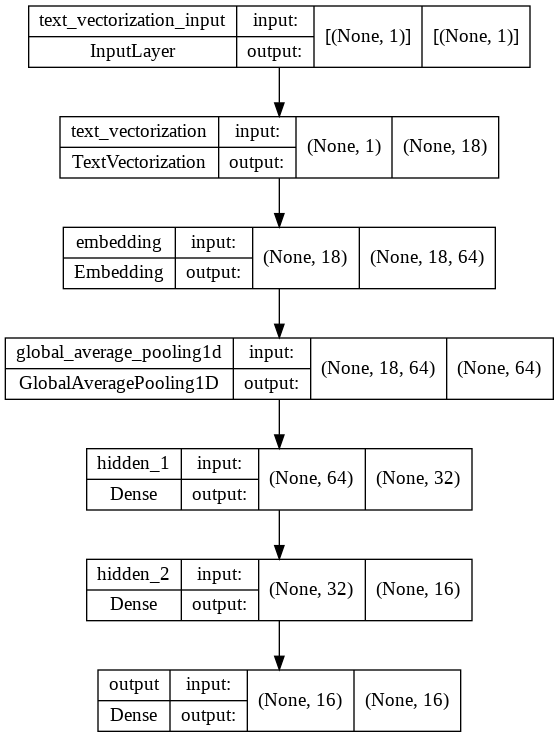

In [64]:
# visualisasi arsitektur basic model rnn 
keras.utils.plot_model(model1, show_shapes=True)

In [65]:
# compile model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [66]:
# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights = True)

Callbacks early stopping digunakan untuk mengefisiensikan waktu epochs saat training model.

In [67]:
# fit basic model rnn
history1 = model1.fit(train_dataset, 
                      epochs = 30,
                      validation_data = (val_dataset),
                      callbacks = [early_stop])

Epoch 1/30
818/818 [==============================] - 11s 9ms/step - loss: 1.9351 - accuracy: 0.3868 - val_loss: 1.1455 - val_accuracy: 0.7001
Epoch 2/30
818/818 [==============================] - 4s 5ms/step - loss: 0.6023 - accuracy: 0.8512 - val_loss: 0.4162 - val_accuracy: 0.9062
Epoch 3/30
818/818 [==============================] - 4s 5ms/step - loss: 0.2065 - accuracy: 0.9544 - val_loss: 0.2735 - val_accuracy: 0.9494
Epoch 4/30
818/818 [==============================] - 4s 5ms/step - loss: 0.0981 - accuracy: 0.9799 - val_loss: 0.2396 - val_accuracy: 0.9615
Epoch 5/30
818/818 [==============================] - 4s 5ms/step - loss: 0.0553 - accuracy: 0.9890 - val_loss: 0.2250 - val_accuracy: 0.9673
Epoch 6/30
818/818 [==============================] - 4s 5ms/step - loss: 0.0350 - accuracy: 0.9933 - val_loss: 0.2411 - val_accuracy: 0.9684
Epoch 7/30
818/818 [==============================] - 4s 5ms/step - loss: 0.0253 - accuracy: 0.9949 - val_loss: 0.2356 - val_accuracy: 0.9716
Epoch

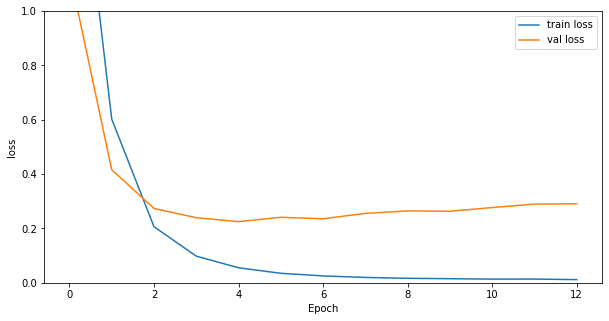

In [68]:
# visualisasi hasil training basic model rnn
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history1.epoch[-1]+1),history1.history['loss'],label='train loss')
ax.plot(range(history1.epoch[-1]+1),history1.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training basic model RNN diatas menunjukan bahwa model ini overfitting dengan gap hasil antara val loss dan train loss yang cukup jauh. Sebelum menarik kesimpulan model terbaik, mari kita lihat model lainnya terlebih dahulu.

## 2. Improve Model RNN dengan LSTM

LSTM merupakan metode yang lebih kompleks dari model basic RNN. LSTM ini menerapkan prinsip yang sama seperti ingatan manusia, yaitu model memiliki Long memory dan short memory. Model yang lebih kompleks ini sangat sesuai dengan dataset yang cukup besar.

In [69]:
# improve model RNN (LSTM)
model2 = Sequential()

# vectorization layers
model2.add(text_vectorization)

# embedding layers
model2.add(embedding)

# LSTM layers
model2.add(LSTM(32))

# output layers
model2.add(Dense(16, activation = 'softmax', name = 'output'))

In [70]:
# summary improve model RNN (LSTM)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 18)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 18, 64)            615168    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 output (Dense)              (None, 16)                528       
                                                                 
Total params: 628,112
Trainable params: 628,112
Non-trainable params: 0
_________________________________________________________________


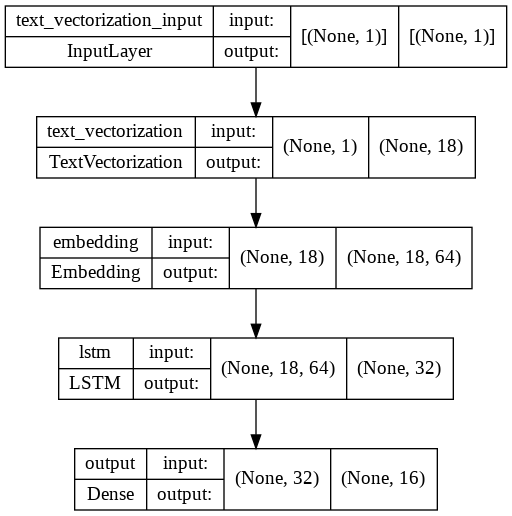

In [71]:
# visualisasi arsitektur improve model RNN (LSTM) 
keras.utils.plot_model(model2, show_shapes=True)

In [72]:
# compile model
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [73]:
# fit improve model rnn (LSTM)
history2 = model2.fit(train_dataset, 
                      epochs = 30,
                      validation_data = (val_dataset),
                      callbacks = [early_stop])

Epoch 1/30
818/818 [==============================] - 9s 7ms/step - loss: 0.5554 - accuracy: 0.8479 - val_loss: 0.2271 - val_accuracy: 0.9552
Epoch 2/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0738 - accuracy: 0.9847 - val_loss: 0.2001 - val_accuracy: 0.9682
Epoch 3/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0509 - accuracy: 0.9899 - val_loss: 0.1945 - val_accuracy: 0.9693
Epoch 4/30
818/818 [==============================] - 6s 8ms/step - loss: 0.0349 - accuracy: 0.9925 - val_loss: 0.2215 - val_accuracy: 0.9616
Epoch 5/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0282 - accuracy: 0.9946 - val_loss: 0.1950 - val_accuracy: 0.9707
Epoch 6/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0223 - accuracy: 0.9952 - val_loss: 0.1964 - val_accuracy: 0.9720
Epoch 7/30
818/818 [==============================] - 6s 8ms/step - loss: 0.0184 - accuracy: 0.9961 - val_loss: 0.1957 - val_accuracy: 0.9719
Epoch 

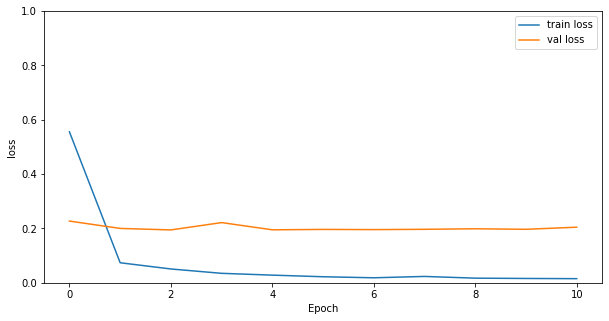

In [74]:
# visualisasi hasil training basic model rnn
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history2.epoch[-1]+1),history2.history['loss'],label='train loss')
ax.plot(range(history2.epoch[-1]+1),history2.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training improve model RNN dengan LSTM diatas menunjukan bahwa model ini masih overfitting. Namun hasilnya masih lebih baik daripada model basic RNN.

## 3. Improve Model RNN dengan GRU

GRU merupakan metode yang lebih simpel daripada LSTM. Model ini cocok untuk dataset yang cukup besar. Untuk melihat perbadingannya dengan kedua model sebelumnya, mari kita lihat performa model improve yang terakhir ini.

In [75]:
# improve model RNN (GRU)
model3 = Sequential()

# vectorization layers
model3.add(text_vectorization)

# embedding layers
model3.add(embedding)

# GRU layers
model3.add(GRU(32))

# output layers
model3.add(Dense(16, activation = 'softmax', name = 'output'))

In [76]:
# summary model RNN (GRU)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 18)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 18, 64)            615168    
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 output (Dense)              (None, 16)                528       
                                                                 
Total params: 625,104
Trainable params: 625,104
Non-trainable params: 0
_________________________________________________________________


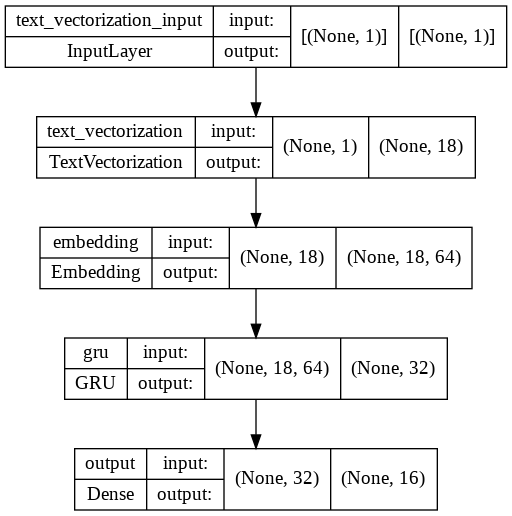

In [77]:
# visualisasi arsitektur improve model (GRU)
keras.utils.plot_model(model3, show_shapes=True)

In [78]:
# compile model
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [79]:
# fit improve model RNN (GRU)
history3 = model3.fit(train_dataset, 
                      epochs = 30,
                      validation_data = (val_dataset),
                      callbacks = [early_stop])

Epoch 1/30
818/818 [==============================] - 8s 7ms/step - loss: 1.1278 - accuracy: 0.6549 - val_loss: 0.3614 - val_accuracy: 0.9263
Epoch 2/30
818/818 [==============================] - 5s 7ms/step - loss: 0.1326 - accuracy: 0.9768 - val_loss: 0.2226 - val_accuracy: 0.9626
Epoch 3/30
818/818 [==============================] - 5s 7ms/step - loss: 0.0535 - accuracy: 0.9909 - val_loss: 0.1917 - val_accuracy: 0.9722
Epoch 4/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0337 - accuracy: 0.9937 - val_loss: 0.1939 - val_accuracy: 0.9719
Epoch 5/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0228 - accuracy: 0.9959 - val_loss: 0.1904 - val_accuracy: 0.9742
Epoch 6/30
818/818 [==============================] - 6s 7ms/step - loss: 0.0195 - accuracy: 0.9966 - val_loss: 0.2043 - val_accuracy: 0.9708
Epoch 7/30
818/818 [==============================] - 7s 8ms/step - loss: 0.0164 - accuracy: 0.9968 - val_loss: 0.1922 - val_accuracy: 0.9731
Epoch 

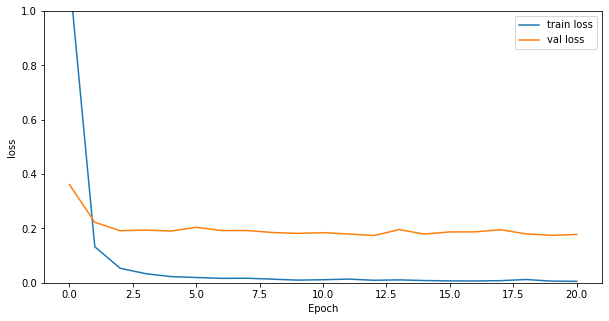

In [80]:
# visualisasi hasil training improve model rnn (GRU)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history3.epoch[-1]+1),history3.history['loss'],label='train loss')
ax.plot(range(history3.epoch[-1]+1),history3.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training improve model RNN dengan GRU diatas menunjukan bahwa model masih overfitting, namun hasilnya terlihat lebih stabil dibandingkan dengan model RNN dengan LSTM.

## Best Model

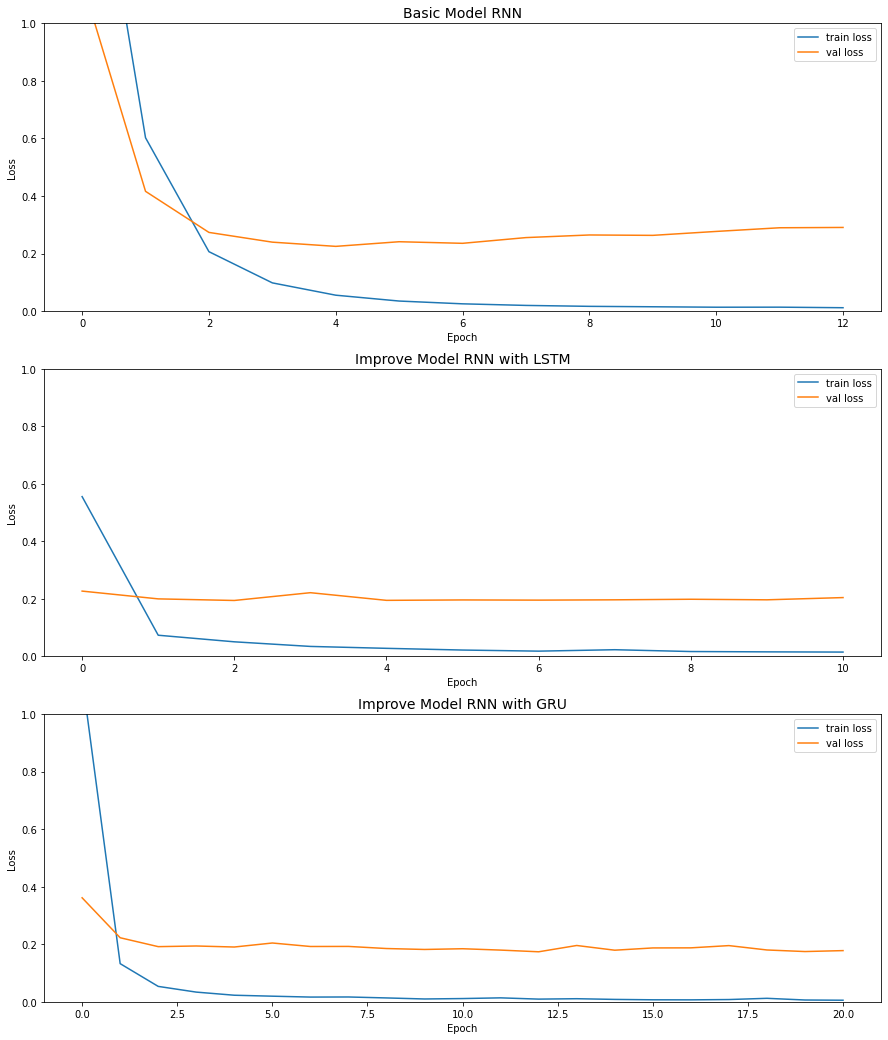

In [81]:
# visualisasi 3 model RNN
fig, ax = plt.subplots(nrows = 3, figsize=(15,18))

ax[0].plot(range(history1.epoch[-1]+1),history1.history['loss'],label='train loss')
ax[0].plot(range(history1.epoch[-1]+1),history1.history['val_loss'],label='val loss')
ax[0].set_title('Basic Model RNN', size = 14)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,1])
ax[0].legend()

ax[1].plot(range(history2.epoch[-1]+1),history2.history['loss'],label='train loss')
ax[1].plot(range(history2.epoch[-1]+1),history2.history['val_loss'],label='val loss')
ax[1].set_title('Improve Model RNN with LSTM', size = 14)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_ylim([0,1])
ax[1].legend()

ax[2].plot(range(history3.epoch[-1]+1),history3.history['loss'],label='train loss')
ax[2].plot(range(history3.epoch[-1]+1),history3.history['val_loss'],label='val loss')
ax[2].set_title('Improve Model RNN with GRU', size = 14)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].set_ylim([0,1])
ax[2].legend()

plt.show()

In [82]:
print('Maksimum Accuracy Score pada Basic Model RNN\t\t:', max(history1.history['val_accuracy']))
print('Maksimum Accuracy Score pada Improve Model RNN (LSTM)\t:', max(history2.history['val_accuracy']))
print('Maksimum Accuracy Score pada Improve Model RNN (GRU)\t:', max(history3.history['val_accuracy']))

Maksimum Accuracy Score pada Basic Model RNN		: 0.9737123847007751
Maksimum Accuracy Score pada Improve Model RNN (LSTM)	: 0.9724896550178528
Maksimum Accuracy Score pada Improve Model RNN (GRU)	: 0.9781445860862732


Dari ketiga hasil training model RNN diatas, terlihat bahwa seluruh model mengalami overfitting, namun diantara ketiga model tersebut, Improve Model RNN dengan GRU menghasilkan performa train loss dan val loss yang lebih stabil dibandingkan dengan kedua model lainnya. Pada hasil accuracy scorenya pun model improve model RNN dengan GRU menunjukan hasil yang paling tinggi diantara model lainnya. Sehingga penentuan model terbaik adalah improve model RNN dengan GRU.  

> Model Terbaik : model3 (Improve model RNN dengan GRU)





___________________

# VIII. Model Predict Data Test

Setelah menentukan model terbaik, berikutnya saya akan mencoba model terbaik ini untuk memprediksi data test-set.

In [83]:
# model predict test-set
y_pred_test3 = np.argmax(model3(X_test), axis=-1)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       642
           1       0.97      0.98      0.98      1988
           2       0.96      0.97      0.96       691
           3       0.96      0.97      0.97       479
           4       0.98      0.99      0.99       469
           5       0.98      0.95      0.96       497
           6       0.97      0.97      0.97       434
           7       0.99      0.99      0.99      1294
           8       0.95      0.98      0.96       184
           9       0.98      0.98      0.98       331
          10       0.99      0.99      0.99       828
          11       0.99      0.96      0.97        77
          12       1.00      0.97      0.99        80
          13       0.93      0.96      0.95       163
          14       1.00      0.55      0.71        11
          15       1.00      1.00      1.00        11

    accuracy                           0.98      8179
   macro avg       0.98   

Hasil classification report diatas menunjukan bahwa model RNN ini dapat menghasilkan tingkat akurasi 98%. Model ini sudah cukup baik dalam melalukan text categorization judul trending video youtube, sehingga model ini dapat kita lakukan model inference pada data inference.

___________________

# IX. Model Inference

Pada model inference ini saya akan mencoba mengaplikasikan model yang sudah saya buat sebelumnya untuk memprediksi kategori judul video trending youtube pada data inference yang sudah dipisahkan sebelumnya.

In [84]:
df_inf

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,tfREC-AkX20,2018-04-21,Why black Americans are getting less sleep,Vox,News & Politics,25,2018-04-12 13:55:36,"SleepCycle|""sleep""|""science""|""vox""|""Vox.com""|""...",667705,10038,34254,10818,https://i.ytimg.com/vi/tfREC-AkX20/default.jpg,False,False,False,How the sleep gap reflects inequality and cont...
1,F388-6yDDpc,2017-11-17,Cowboys vs. Falcons | NFL Week 10 Game Highlights,NFL,Sports,17,2017-11-13 00:51:15,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",1014512,5954,541,3174,https://i.ytimg.com/vi/F388-6yDDpc/default.jpg,False,False,False,The Dallas Cowboys battle the Atlanta Falcons ...
2,mG9kK9TgxkQ,2017-12-10,Glam Masters | Official Trailer | New Series P...,Lifetime,Entertainment,24,2017-12-05 18:13:45,"lifetime|""lifetime shows""|""lifetime tv""|""lifet...",63283,187,39,30,https://i.ytimg.com/vi/mG9kK9TgxkQ/default.jpg,False,False,False,"Lifetime’s new beauty competition series, Glam..."
3,GO_Jxa6dWyo,2018-03-18,Could You Be Immune To Everything?,It's Okay To Be Smart,Education,27,2018-03-07 17:32:51,"science|""pbs digital studios""|""pbs""|""joe hanso...",213958,11023,112,717,https://i.ytimg.com/vi/GO_Jxa6dWyo/default.jpg,False,False,False,You can learn more at https://curiositystream....
4,8ENIIcMmeD0,2018-02-21,♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡,Nikita Dragun,Howto & Style,26,2018-02-13 19:59:13,"Nikita Dragun|""nikita""|""dragun""|""makeup""|""mua""...",506920,35041,564,1968,https://i.ytimg.com/vi/8ENIIcMmeD0/default.jpg,False,False,False,This makeup look is perfect for Valentines Day...
5,d380meD0W0M,2017-11-16,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2584165,147110,2305,19313,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
6,p2ZNmYnx7ds,2018-03-08,UFC 222: Brian Ortega Octagon Interview,UFC - Ultimate Fighting Championship,Sports,17,2018-03-04 05:32:55,"ufc|""222""|""brian""|""ortega""|""octagon""|""intervie...",531165,4979,226,1931,https://i.ytimg.com/vi/p2ZNmYnx7ds/default.jpg,False,False,False,Hear from Brian Ortega inside of the Octagon a...
7,903QDFbbeww,2018-04-27,I Ran 10 Miles Every Day Like Casey Neistat,BuzzFeedVideo,People & Blogs,22,2018-04-25 18:00:51,"BuzzFeed|""BuzzFeedVideo""|""BuzzFeed Video""|""Vid...",688120,19352,1068,1338,https://i.ytimg.com/vi/903QDFbbeww/default.jpg,False,False,False,"If I'm gonna run like Casey, I gotta really go..."
8,LeFxjRMv5U8,2018-03-24,Meet Cora,Kitty Hawk,Science & Technology,28,2018-03-13 04:53:26,"flying car|""kitty hawk""|""drone""|""tesla""|""air t...",744801,5319,413,1093,https://i.ytimg.com/vi/LeFxjRMv5U8/default.jpg,False,False,False,"Meet Cora, Kitty Hawk's prototype air taxi tha..."
9,zNZJNlx4P80,2018-06-03,WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),HellthyJunkFood,Entertainment,24,2018-05-30 23:59:24,"giant macaron|""macaroon""|""how to make macaroon...",449100,10629,589,1794,https://i.ytimg.com/vi/zNZJNlx4P80/default.jpg,False,False,False,SUBSCRIBE HERE ➡️ https://goo.gl/CitGia2ND CHA...


In [85]:
df_inf[['title', 'category']]

,title,category
0,Why black Americans are getting less sleep,News & Politics
1,Cowboys vs. Falcons | NFL Week 10 Game Highlights,Sports
2,Glam Masters | Official Trailer | New Series P...,Entertainment
3,Could You Be Immune To Everything?,Education
4,♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡,Howto & Style
5,I Dare You: GOING BALD!?,Entertainment
6,UFC 222: Brian Ortega Octagon Interview,Sports
7,I Ran 10 Miles Every Day Like Casey Neistat,People & Blogs
8,Meet Cora,Science & Technology
9,WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),Entertainment


Sebelum melakukan model inference, saya perlu melakukan tahapan data preprocessing agar data inference siap untuk diprediksi dengan menggunakan model. Proses data preprocessing akan melakukan proses yang sama seperti data preprocessing pada train-set dan test-set sebelumnya.

In [86]:
# split label dan fitur
X_inf = df_inf['title']
y_inf = df_inf['category']

In [87]:
# encode label
y_inf = y_inf.map(category_name)

In [88]:
X_inf

0           Why black Americans are getting less sleep
1    Cowboys vs. Falcons | NFL Week 10 Game Highlights
2    Glam Masters | Official Trailer | New Series P...
3                   Could You Be Immune To Everything?
4    ♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡
5                             I Dare You: GOING BALD!?
6              UFC 222: Brian Ortega Octagon Interview
7          I Ran 10 Miles Every Day Like Casey Neistat
8                                            Meet Cora
9      WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS)
Name: title, dtype: object

In [89]:
# text preprocessing data inference
X_inf = X_inf.apply(lambda a: text_process2(a))
X_inf

0                   black americans getting less sleep
1       cowboys vs falcons nfl week 10 game highlights
2    glam masters official trailer new series premi...
3                              could immune everything
4        valentines day heart freckles makeup tutorial
5                                      dare going bald
6               ufc 222 brian ortega octagon interview
7            ran 10 miles every day like casey neistat
8                                            meet cora
9                tried make tasty giant macaron versus
Name: title, dtype: object

In [90]:
# model predict data inference
y_pred_inf = np.argmax(model3(X_inf), axis=-1)
print(classification_report(y_inf, y_pred_inf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Hasil model inference diatas menunjukan bahwa tingkat akurasi model dalam memprediksi kategori pada data inference adalah benar 100%. Hasil ini dapat dikatakan sangat baik karena model RNN kita dapat melakukan text categorization sebagaimana mestinya tanpa salah prediksi satu pun.

In [91]:
y_pred_inf

array([ 5,  6,  1,  9, 10,  1,  6,  0,  3,  1])

In [92]:
inf_pred = pd.DataFrame(y_pred_inf, columns = ['Category - Prediction'])
inf_pred

,Category - Prediction
0,5
1,6
2,1
3,9
4,10
5,1
6,6
7,0
8,3
9,1


In [93]:
category_name_inf = {0:'People & Blogs',
                    1:'Entertainment', 
                    2:'Comedy',
                    3:'Science & Technology', 
                    4:'Film & Animation', 
                    5:'News & Politics',
                    6:'Sports', 
                    7:'Music', 
                    8:'Pets & Animals', 
                    9:'Education',
                    10:'Howto & Style',
                    11:'Autos & Vehicles',
                    12:'Travel & Events',
                    13:'Gaming',
                    14:'Nonprofits & Activism',
                    15:'Shows'}

In [94]:
inf_pred['Category - Prediction'] = inf_pred['Category - Prediction'].map(category_name_inf)

In [95]:
inf_pred

,Category - Prediction
0,News & Politics
1,Sports
2,Entertainment
3,Education
4,Howto & Style
5,Entertainment
6,Sports
7,People & Blogs
8,Science & Technology
9,Entertainment


In [96]:
# Perbandingan prediksi model dengan data sesungguhnya
pd.concat([df_inf, inf_pred], axis = 1)[['title', 'category', 'Category - Prediction']]

,title,category,Category - Prediction
0,Why black Americans are getting less sleep,News & Politics,News & Politics
1,Cowboys vs. Falcons | NFL Week 10 Game Highlights,Sports,Sports
2,Glam Masters | Official Trailer | New Series P...,Entertainment,Entertainment
3,Could You Be Immune To Everything?,Education,Education
4,♡ VALENTINES DAY HEART FRECKLES MAKEUP TUTORIAL ♡,Howto & Style,Howto & Style
5,I Dare You: GOING BALD!?,Entertainment,Entertainment
6,UFC 222: Brian Ortega Octagon Interview,Sports,Sports
7,I Ran 10 Miles Every Day Like Casey Neistat,People & Blogs,People & Blogs
8,Meet Cora,Science & Technology,Science & Technology
9,WE TRIED TO MAKE TASTY'S GIANT MACARON (VERSUS),Entertainment,Entertainment


Terlihat bahwa model RNN ini dapat melakukan text categorization secara tepat 100% pada judul trending youtube di USA.

____________

# X. Model Limitation

Pada bagian model limitation ini, saya akan mencoba menjelaskan dan memperlihatkan limitasi dari model NLP yang saya buat. Limitasi ini diharapkan dapat menjadi perhatian bagi para pembaca dalam menangkap limitasi atau batasan yang ada pada model NLP ini.

In [97]:
# list seluruh dataset dan labelnya
df_features = df['title']
df_label = df['category']

In [98]:
# text preprocessing
df_features = df_features.apply(lambda a: text_process2(a))

In [99]:
# predict model
pred_all = np.argmax(model3(df_features), axis=-1)

In [100]:
prediction = pd.DataFrame(pred_all, columns = ['Category - Prediction'])

In [101]:
prediction['Category - Prediction'] = prediction['Category - Prediction'].map(category_name_inf)

In [102]:
# concate dataset dengan hasil predict
df_merge = pd.concat([df, prediction], axis = 1)[['title', 'category', 'Category - Prediction']]

In [103]:
# dataframe yang menghasilkan predict error atau salah kategori
df_error = df_merge[df_merge['category'] != df_merge['Category - Prediction']]
df_error.head(20)

,title,category,Category - Prediction
44,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",People & Blogs,Sports
47,Stephon Marbury and Jimmer Fredette fight in C...,Sports,Gaming
78,Jason Momoa & Lisa Bonet: Love at First Sight,Entertainment,Comedy
102,Mark Wahlberg's Kids Use Him for His Celeb Con...,Comedy,Entertainment
111,Empire Of The Sun - Way To Go,Music,Comedy
122,Mean Tweets – Country Music Edition #3,Comedy,Film & Animation
131,L.A. Noire - Nintendo Switch Trailer,Gaming,Pets & Animals
136,Alicia Keys - When You Were Gone,Music,Comedy
139,Live in the now!,Entertainment,People & Blogs
146,"Dropping And CATCHING A Paper Airplane At 2,00...",Entertainment,Pets & Animals


In [104]:
# total kategori yang salah dikategorikan
df_error['category'].value_counts()

Entertainment            1240
Music                    1066
Howto & Style             523
Comedy                    509
Film & Animation          379
People & Blogs            373
Science & Technology      286
News & Politics           279
Gaming                    268
Sports                    256
Education                 174
Pets & Animals            128
Travel & Events            38
Shows                      22
Nonprofits & Activism      17
Autos & Vehicles           10
Name: category, dtype: int64

Limitasi dari model NLP ini adalah jika terdapat musisi yang mengeluarkan single mereka di youtube maka model ini kurang dapat melakukan kategorisasi jenis 'music' karena terdapat ambiguitas dari setiap judul lagu yang mereka rilis. Model ini hanya dapat melakukan kategorisasi berdasarkan kata yang terdapat di dalam judul video, sehingga model akan kesulitan dalam melakukan kategorisasi jenis 'music'. Adapula judul video dengan jenis kategori 'entertainment' yang sangat mengandung ambiguitas sehingga model sulit melakukan kategorisasi 'entertainment'. Content creator youtube tentu tidak selalu akan secara eksplisit menulis judul yang mengandung unsur 'entertainment' sehingga model akan kehilangan kemampuan dalam melakukan kategorisasi jenis ini.

Adapun limitasi dari model NLP ini berdasarkan dari karakteristik dataset yang digunakan dalam pembuatan model yaitu sebagai berikut:
1. Dataset ini mengambil data dari youtube di negara USA, sehingga limitasi dari model ini hanya dapat digunakan pada youtube USA.
2. Dataset ini mengambil data dari bulan November 2017 sampai Juni 2018, sehingga video trending yang lebih baru atau lebih lama dari range bulan tersebut akan sulit dikategorikan dengan baik.
3. Konten-konten baru setelah bulan Juni 2018 akan sulit dikategorikan karena model ini tidak menerima pembelajaran dari data konten baru tersebut.

Limitasi dari model ini dapat ditackle dengan melakukan improvement baik dari sisi dataset maupun dari sisi model NLP. Improvement yang dapat saya sarankan kedepannya adalah sebagai berikut:
1. Membuat model NLP untuk text categorization pada kolom `tags` dan `description` karena kedua kolom tersebut dapat menambah informasi yang dibutuhkan model NLP dalam melakukan text categorization.
2. Menambah dataset trending youtube hingga tahun 2022 agar model dapat lebih up to date pada masa kini. 

_______________

# XI. Word Cloud Top 3 Category

Melanjuti pada bagian EDA diawal, saya telah menjanjikan untuk menampilkan visualisasi word cloud top 3 category, yaitu 'entertainmen', 'music', dan 'howto & style'. Berikut adalah visualisasi wordcloud pada tiga kategori tersebut:

## Entertainment

In [105]:
index_ent = df[df['category'] == 'Entertainment'].index

In [106]:
df_ent = df_features.loc[index_ent]

(-0.5, 399.5, 199.5, -0.5)

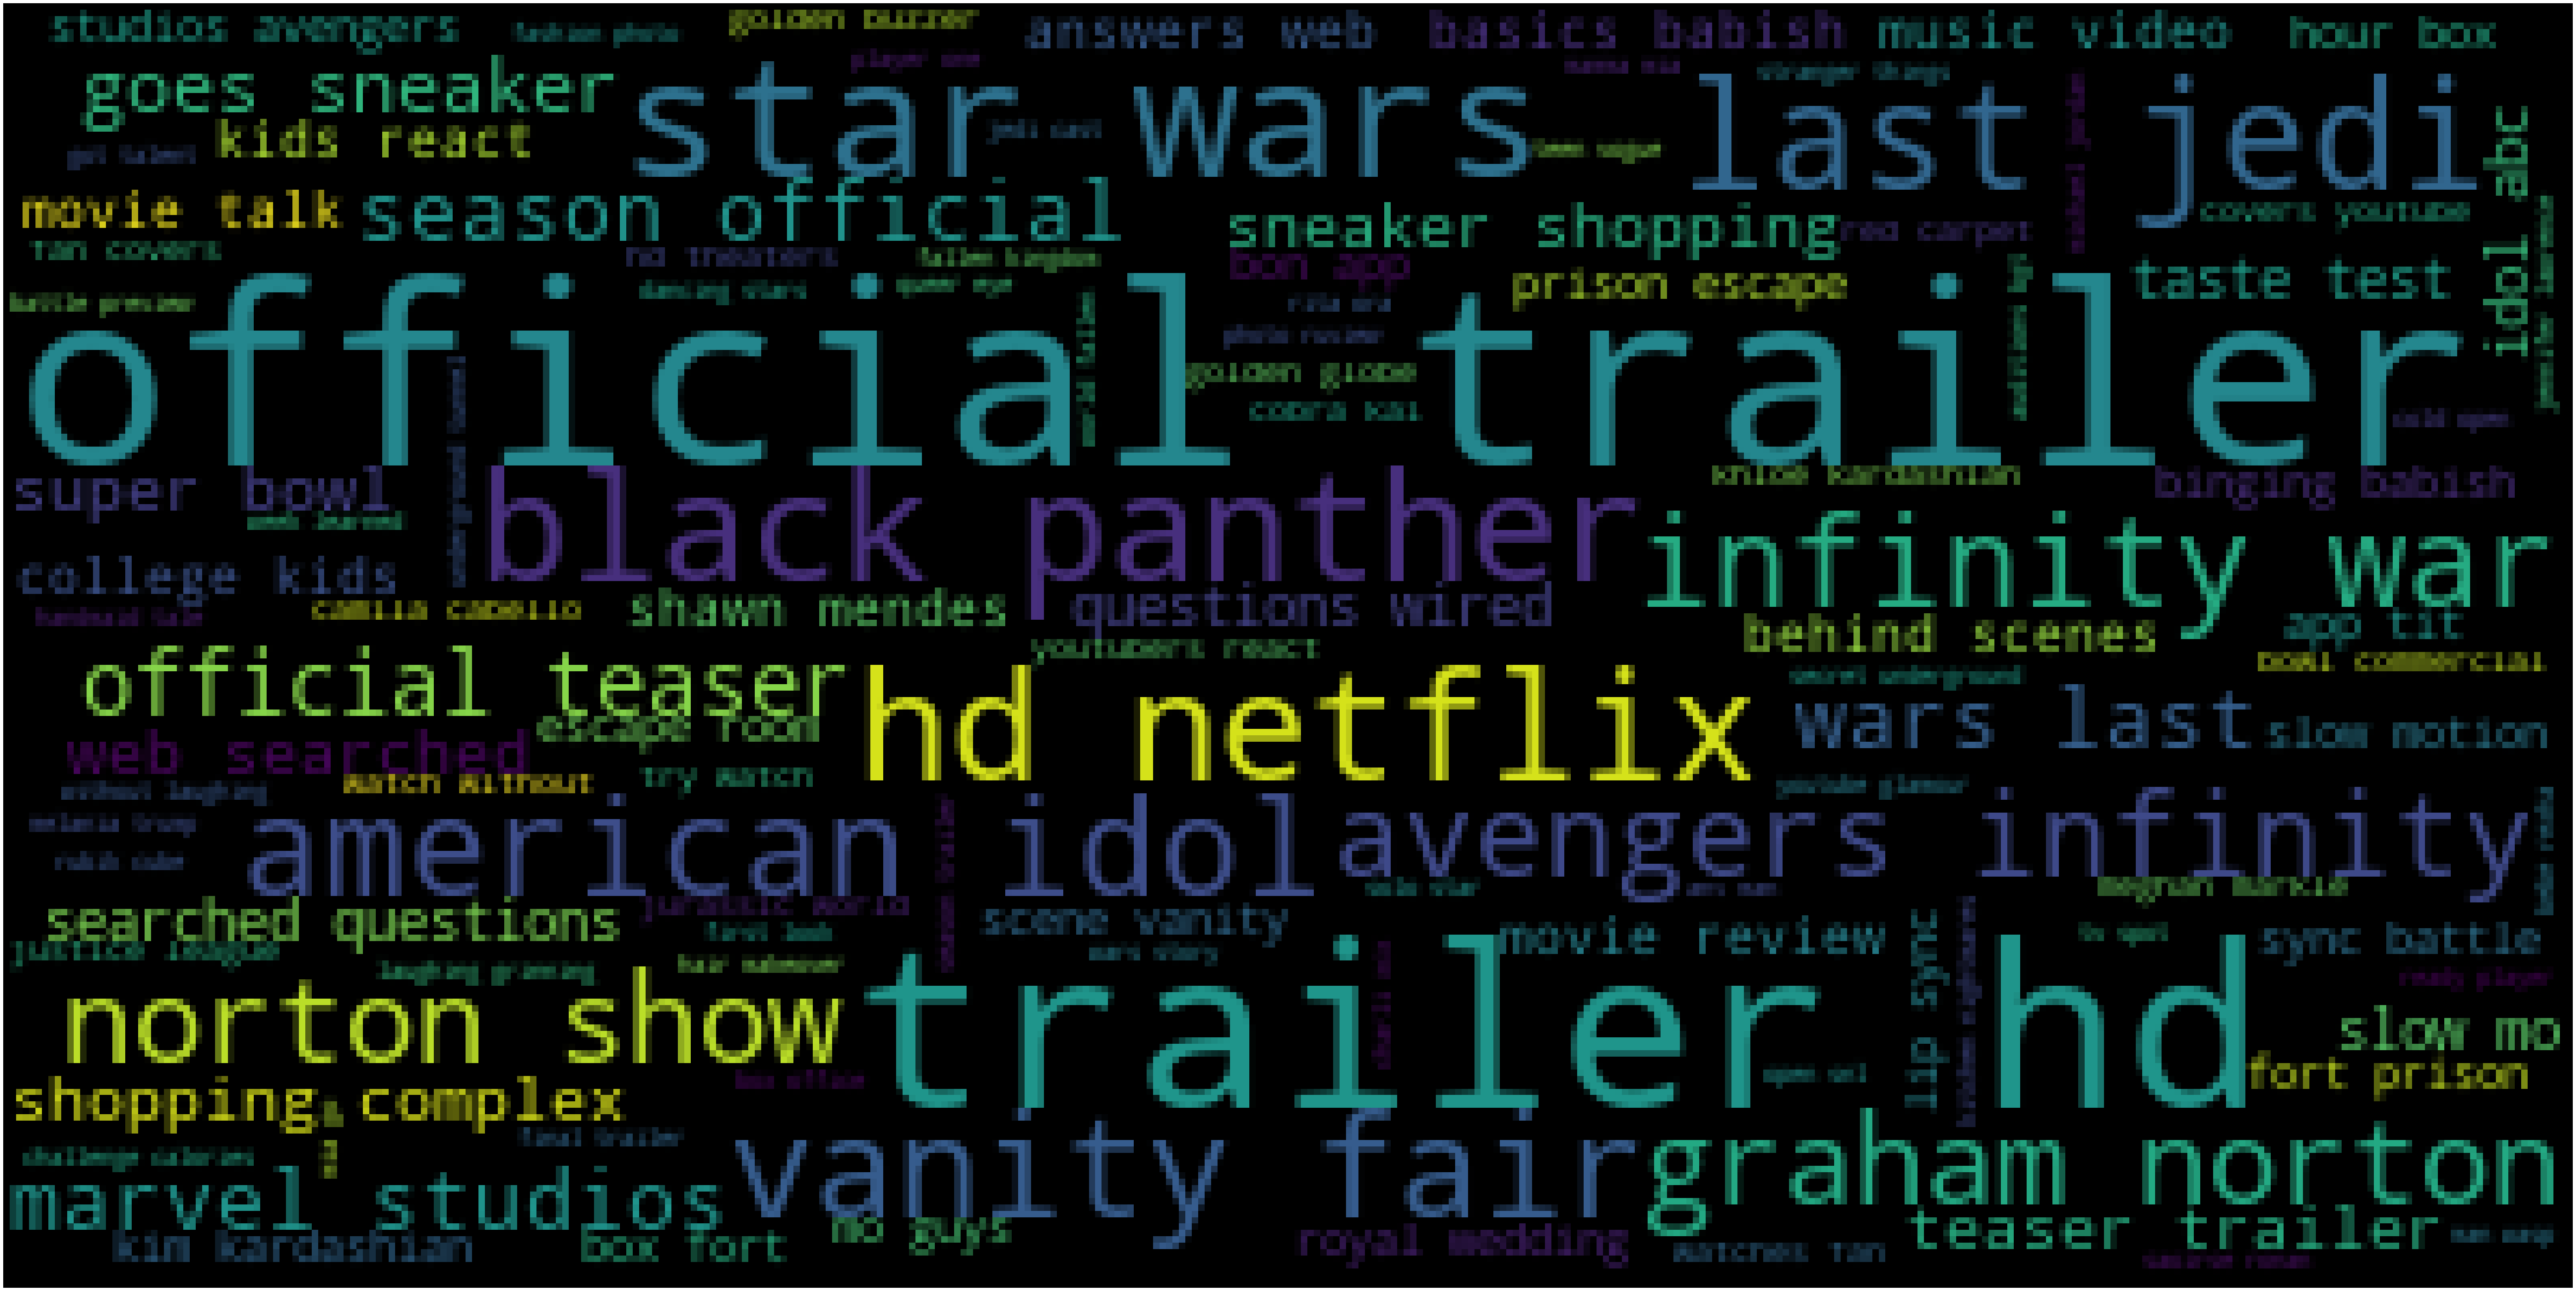

In [107]:
plt.figure(figsize = (100,100))
wc = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(df_ent))
plt.imshow(wc)
plt.axis('off')

Word Cloud kategori 'Entertaiment' diatas menunjukan bahwa banyak sekali kata trailer, official, american, idol, hd, netflix, dll. Kata-kata ini menggambarkan jenis kategori 'Entertainment' secara umum pada trending video youtube.

## Music

In [108]:
index_mus = df[df['category'] == 'Music'].index

In [109]:
df_mus = df_features.loc[index_mus]

(-0.5, 399.5, 199.5, -0.5)

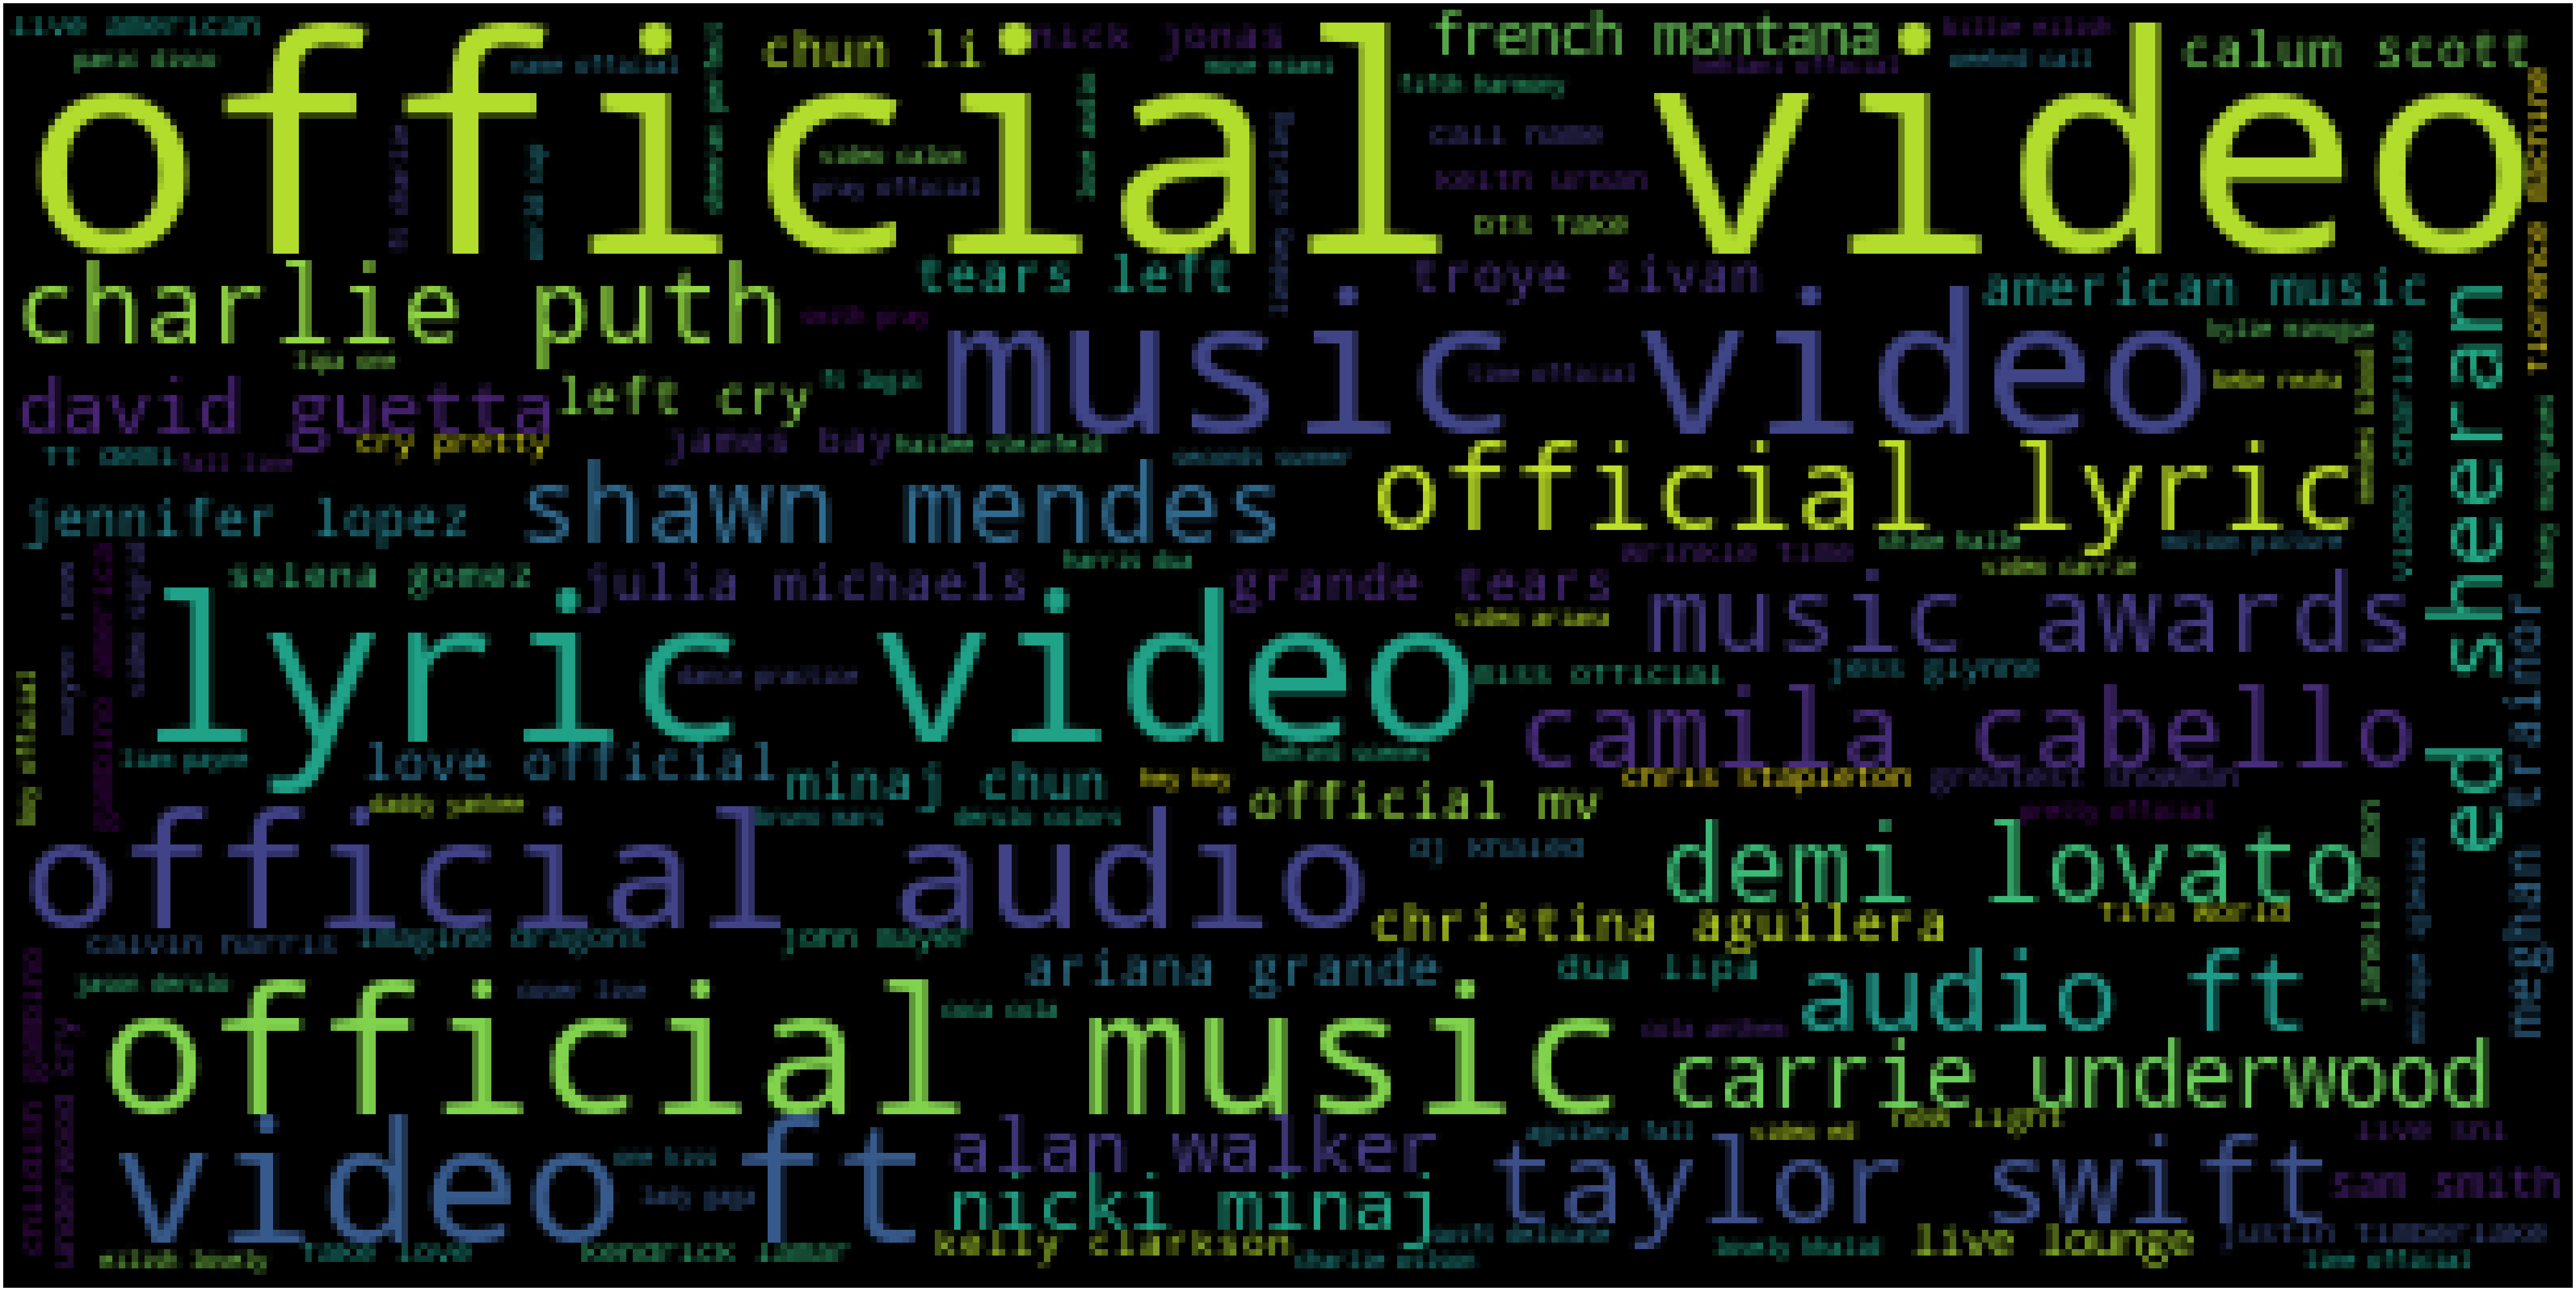

In [110]:
plt.figure(figsize = (100,100))
wc1 = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
wc1.generate(' '.join(df_mus))
plt.imshow(wc1)
plt.axis('off')

Word Cloud kategori 'Music' diatas menunjukan bahwa banyak sekali kata official, lyric, video, music, awards, dan beberapa nama musisi terkenal. Kata-kata ini menggambarkan jenis kategori 'Music' secara umum pada trending video youtube.

## Howto & Style

In [111]:
index_hts = df[df['category'] == 'Howto & Style'].index

In [112]:
df_hts = df_features.loc[index_hts]

(-0.5, 399.5, 199.5, -0.5)

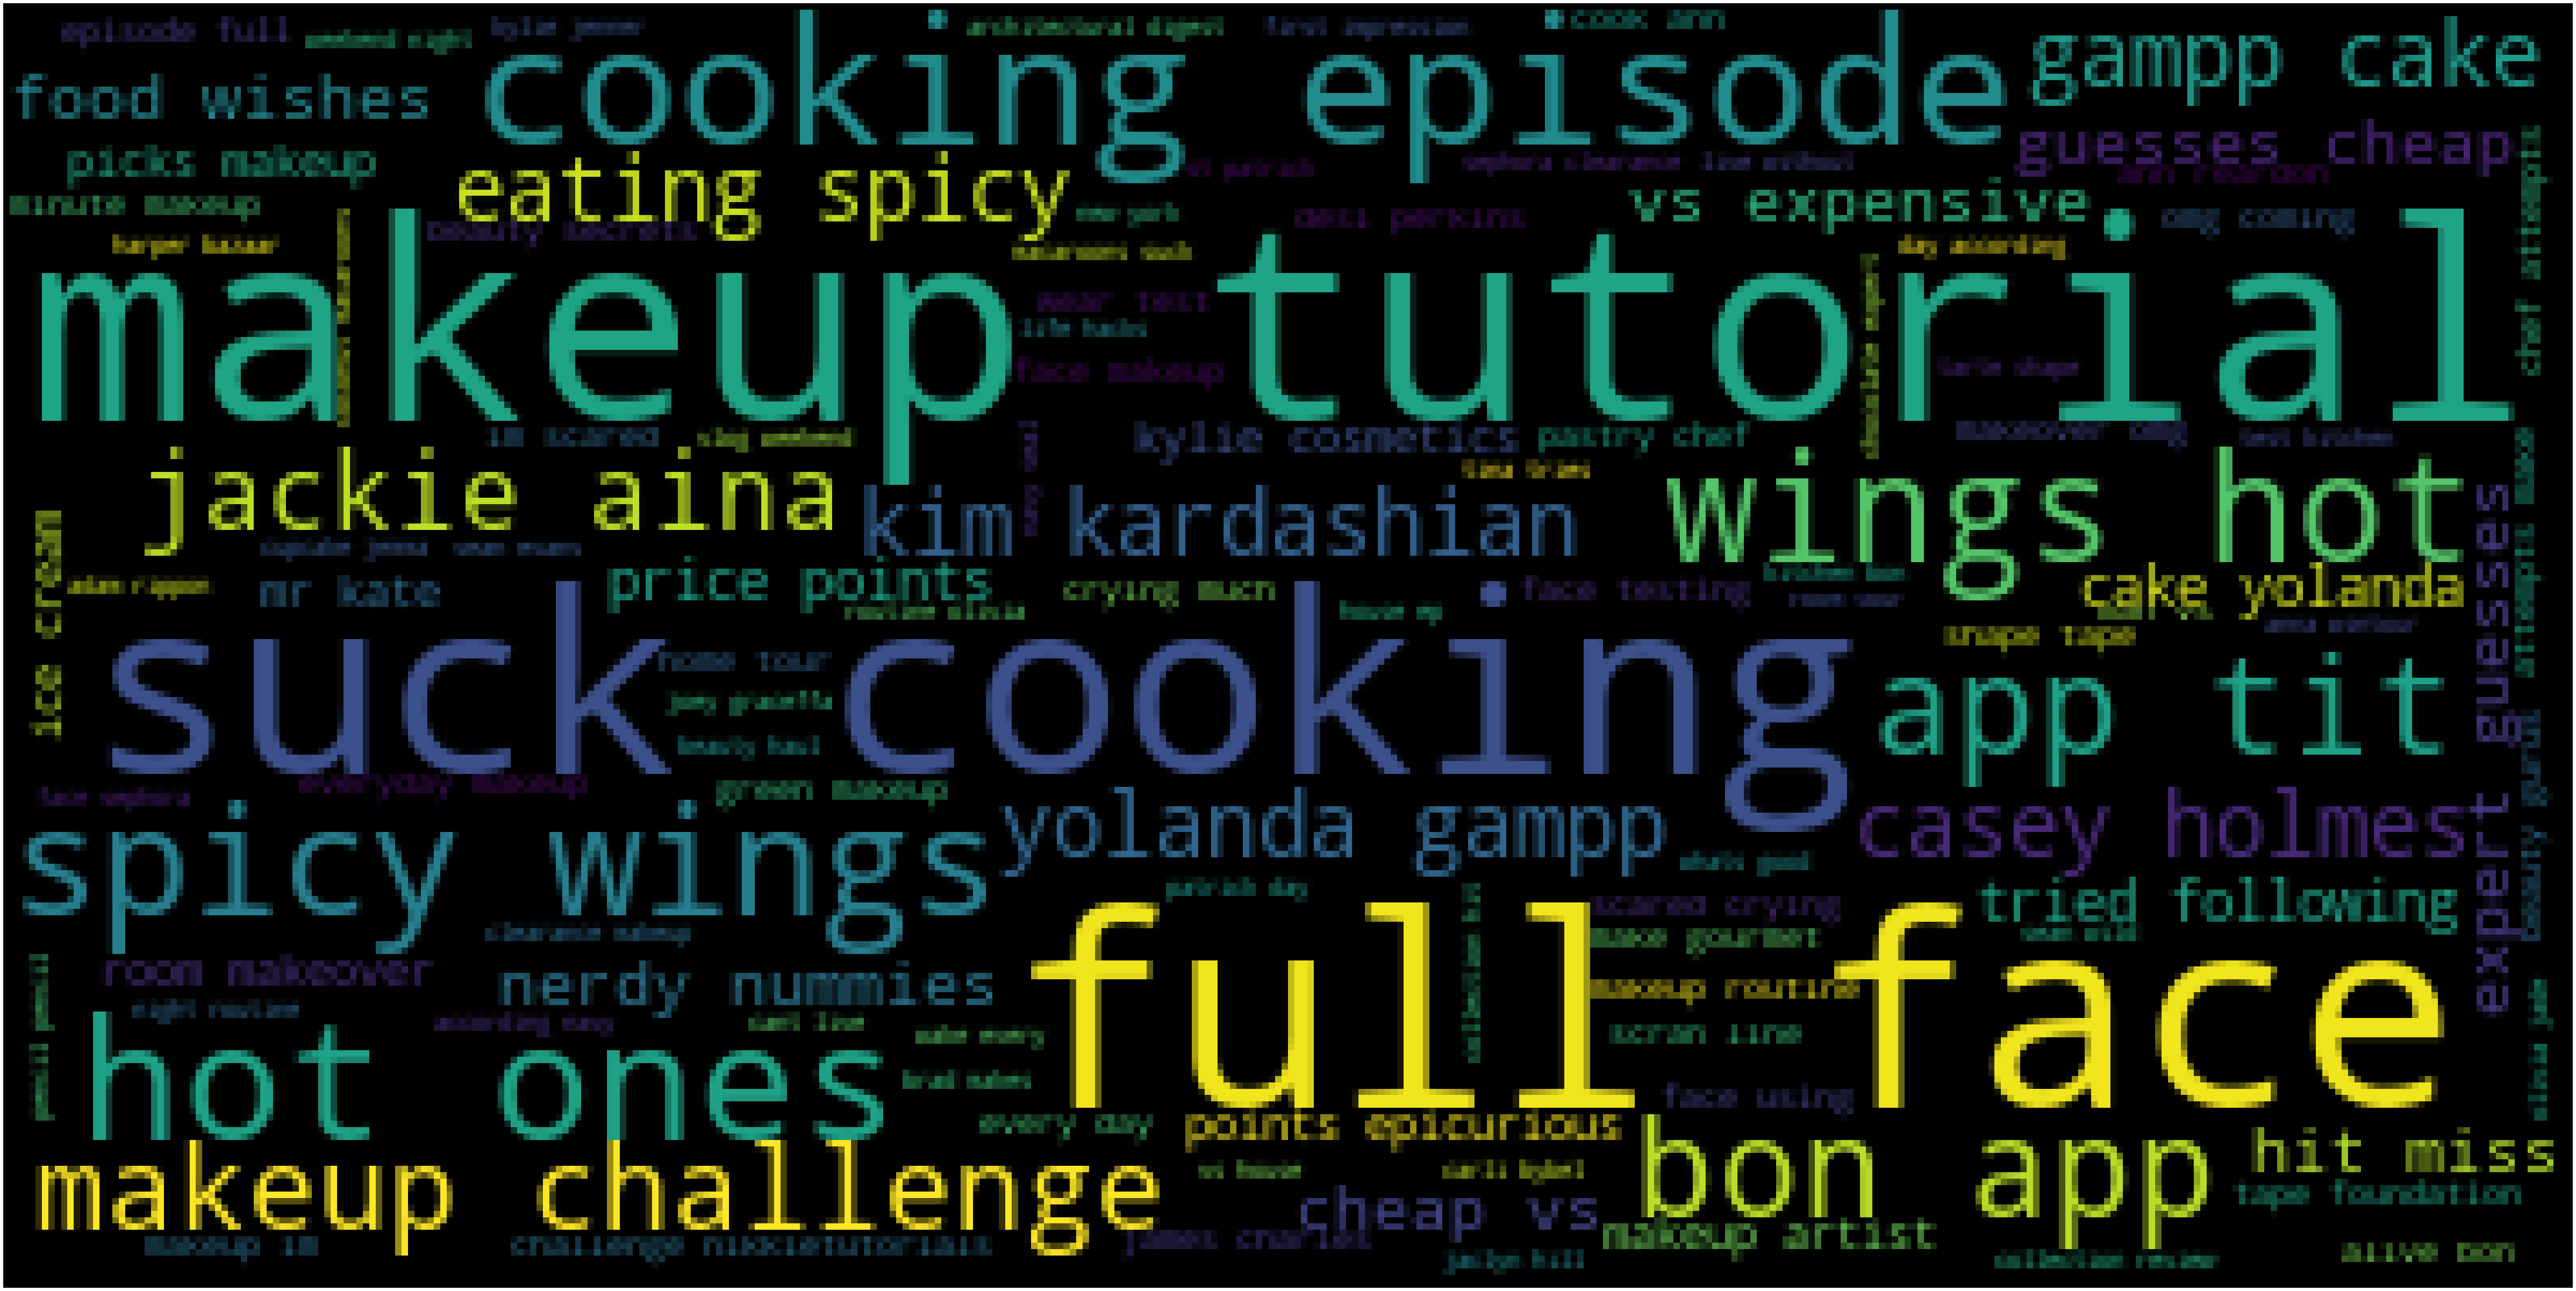

In [113]:
plt.figure(figsize = (100,100))
wc2 = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
wc2.generate(' '.join(df_hts))
plt.imshow(wc2)
plt.axis('off')

Word Cloud kategori 'Howto & Style' diatas menunjukan bahwa banyak sekali kata makeup, tutorial, cooking, episode, full face, dll. Kata-kata ini menggambarkan jenis kategori 'Howto & Style' secara umum pada trending video youtube. Kita juga dapat menggunakan kosa kata pada kategori ini untuk mengincar trending video youtube kita di kategori 'Howto & Style'.

_______

# XII. Conclusion

Kesimpulan dari notebook ini adalah sebagai berikut:
1. Hasil EDA menunjukan bahwa kategori 'Entertainment' merupakan kategori yang paling banyak trending di youtube USA, lalu diikuti oleh kategori 'Music' dan 'Howto & Style'. Hasil EDA juga menunjukan channel-channel korporasi besar seperti ESPN, The Tonight Show, Netflix, Voox, mendominasi trending youtube, channel-channel content creator personal kalah bersaing dengan channel besar lainnya.
2. Model NLP yang terbaik adalah model RNN dengan menggunakan GRU. Model ini mendapatkan performa tingkat akurasi 98% pada data test-set dan dinilai sudah cukup baik dalam melakukan text categorization video trending youtube.
3. Hasil model inference berhasil melakukan text categorization dengan tingkat akurasi 100%. Seluruh data inference dapat terkategorisasi dengan baik.
4. Terdapa limitasi pada model ini yaitu model NLP ini sulit melakukan kategorisasi jenis 'music' karena terdapat ambiguitas pada judul video single mereka. Adapula pada jenis kategori 'Entertainment' yang banyak menyimpan kata ambigu didalamnya sehingga model sulit melakukan text categorization pada kategori ini. Model improvement diharapkan dapat mengatas masalah-masalah limitasi tersebut di masa yang akan datang.